# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Hidayatul Fatwa]
- **Email:** [fatwahidayatul@gmail.com]
- **ID Dicoding:** [MC323D5Y0438]

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi metode pembayaran yang paling sering digunakan oleh pelanggan?
2. Apakah ada korelasi antara jumlah cicilan (payment_installments) dengan nilai pembayaran (payment_value)?

## Import Semua Packages/Library yang Digunakan

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Data Wrangling

### Gathering Data

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Insight:**
- Pesan "Drive already mounted at /content/drive" menunjukkan bahwa Google Drive sudah terhubung ke Google Colab.

In [132]:
dfreviews = "/content/drive/MyDrive/stupend/proyekanalisisddata/order_payments_dataset.csv"
dfreviews = pd.read_csv(dfreviews)
dfreviews.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Dataset ini berisi informasi mengenai pembayaran pesanan, dengan kolom utama seperti order_id (ID pesanan), payment_sequential (urutan pembayaran untuk satu pesanan), payment_type (jenis metode pembayaran), payment_installments (jumlah cicilan), dan payment_value (nilai pembayaran).

### Assessing Data

In [133]:
# Menampilkan informasi umum tentang dataset, termasuk jumlah kolom, tipe data, dan nilai yang tidak null
dfreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
- Dataset ini berisi 103.886 entri dengan 5 kolom utama, yaitu order_id, payment_sequential, payment_type, payment_installments, dan payment_value.

In [134]:
# mengecek nilai null
print(dfreviews.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


**Insight:**
- Hasil pemeriksaan menunjukkan bahwa tidak ada nilai null dalam dataset, yang berarti semua entri pada setiap kolom terisi dengan lengkap.

In [135]:
# mengecek duplikat data
duplicate_rows = dfreviews[dfreviews.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
print("Duplicate Rows:")
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []


**Insight:**
- Hasil pengecekan menunjukkan bahwa tidak ada data duplikat dalam dataset. Hal ini berarti setiap entri dalam dataset bersifat unik, sehingga tidak diperlukan proses penghapusan atau penyesuaian untuk menangani data ganda.

In [136]:
# Mengecek dimensi data
print("Shape of the DataFrame:", dfreviews.shape)

Shape of the DataFrame: (103886, 5)


**Insight:**
- Dataset terdiri dari 103.886 baris dan 5 kolom, yang menunjukkan bahwa terdapat lebih dari 100 ribu transaksi pembayaran yang terekam.

In [137]:
# mengecek jenis payment_type

# Check the unique values in the 'payment_type' column
unique_payment_types = dfreviews['payment_type'].unique()
print("Unique payment types:", unique_payment_types)

# Count the occurrences of each payment type
payment_type_counts = dfreviews['payment_type'].value_counts()
print("\nPayment type counts:\n", payment_type_counts)

Unique payment types: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']

Payment type counts:
 payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


**Insight:**
- Hasil analisis menunjukkan bahwa metode pembayaran yang paling sering digunakan adalah kartu kredit (credit_card) dengan 76.795 transaksi, diikuti oleh boleto (sistem pembayaran berbasis invoice di Brasil) sebanyak 19.784 transaksi. Metode voucher digunakan dalam 5.775 transaksi, sementara debit card relatif jarang digunakan dengan 1.529 transaksi. Terdapat juga 3 transaksi yang tidak terdefinisi (not_defined), yang mungkin disebabkan oleh kesalahan input atau data yang tidak lengkap.

### Cleaning Data

In [138]:
# menghapus jenis payment_type yaitu not_defined

# Remove rows where 'payment_type' is 'not_defined'
dfreviews = dfreviews[dfreviews['payment_type'] != 'not_defined']

# Verify the change
unique_payment_types = dfreviews['payment_type'].unique()
print("Unique payment types after removal:", unique_payment_types)

payment_type_counts = dfreviews['payment_type'].value_counts()
print("\nPayment type counts after removal:\n", payment_type_counts)

Unique payment types after removal: ['credit_card' 'boleto' 'voucher' 'debit_card']

Payment type counts after removal:
 payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64


**Insight:**
- Setelah menghapus metode pembayaran "not_defined", kini dataset hanya terdiri dari empat metode pembayaran utama: credit_card, boleto, voucher, dan debit_card. Jumlah transaksi untuk masing-masing metode tetap sama seperti sebelumnya, dengan kartu kredit sebagai metode paling dominan, diikuti oleh boleto, voucher, dan kartu debit. Penghapusan data yang tidak terdefinisi ini membantu meningkatkan kualitas analisis, memastikan bahwa hanya transaksi yang valid dan jelas yang digunakan dalam eksplorasi lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [139]:
# Menampilkan 5 Data Teratas dari Dataset
dfreviews.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Dataset ini berisi informasi mengenai pembayaran pesanan, dengan kolom utama seperti order_id (ID pesanan), payment_sequential (urutan pembayaran untuk satu pesanan), payment_type (jenis metode pembayaran), payment_installments (jumlah cicilan), dan payment_value (nilai pembayaran).

In [140]:
# Menampilkan informasi umum tentang dataset, termasuk jumlah kolom, tipe data, dan nilai yang tidak null
dfreviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  object 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  object 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


**Insight:**
- Setelah dilakukan proses pembersihan data (cleaning), jumlah entri dalam dataset dfreviews kini berjumlah 103,883 dengan 5 kolom, yaitu order_id, payment_sequential, payment_type, payment_installments, dan payment_value. Tidak ada nilai yang hilang (null) dalam dataset ini, sehingga tidak diperlukan imputasi atau penghapusan tambahan. Tipe data pada setiap kolom telah sesuai, dengan order_id dan payment_type bertipe object, sedangkan payment_sequential dan payment_installments bertipe integer, serta payment_value bertipe float. Setelah penghapusan metode pembayaran not_defined, dataset kini hanya berisi empat metode pembayaran utama, sehingga lebih bersih dan siap untuk analisis lebih lanjut.

In [141]:
# Mengecek dimensi data
print("Shape of the DataFrame:", dfreviews.shape)

Shape of the DataFrame: (103883, 5)


**Insight:**
- Setelah proses pembersihan data, dataset dfreviews memiliki 103,883 baris dan 5 kolom, menunjukkan bahwa hanya 3 baris yang dihapus dari dataset awal (103,886 baris). Penghapusan ini disebabkan oleh penghapusan metode pembayaran not_defined, yang sebelumnya memiliki 3 entri.

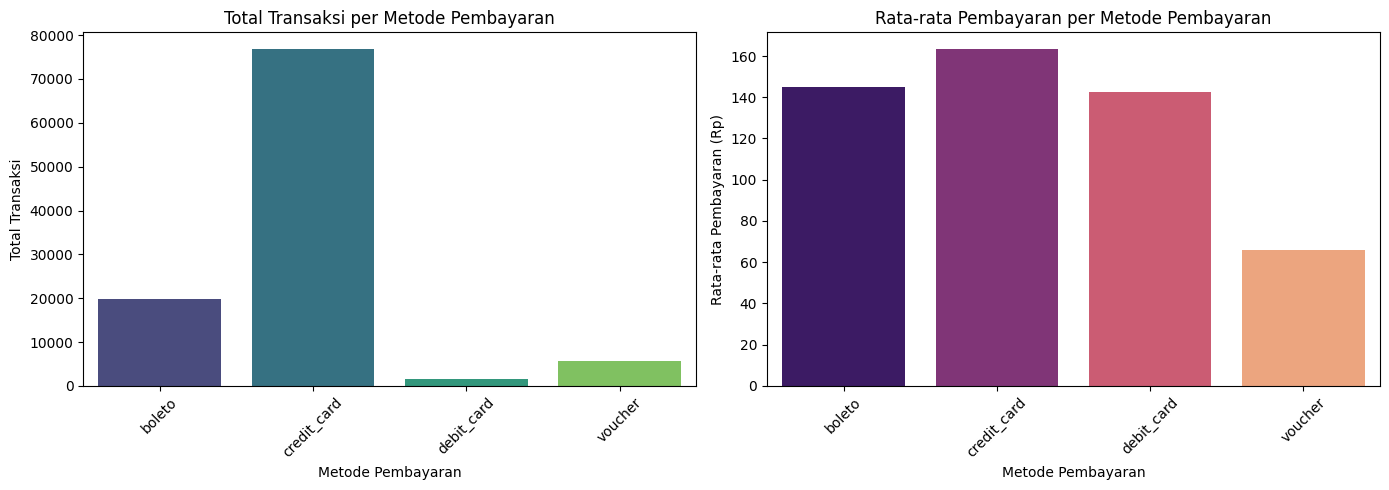

In [142]:
# Agregasi berdasarkan metode pembayaran
agg_payment_type = dfreviews.groupby("payment_type")["payment_value"].agg(["count", "mean", "sum"]).reset_index()
agg_payment_type.columns = ["payment_type", "total_transaksi", "rata_rata_pembayaran", "total_pembayaran"]

# Agregasi berdasarkan jumlah cicilan
agg_installments = dfreviews.groupby("payment_installments")["payment_value"].agg(["count", "mean", "sum"]).reset_index()
agg_installments.columns = ["jumlah_cicilan", "total_transaksi", "rata_rata_pembayaran", "total_pembayaran"]

# Visualisasi Agregasi Berdasarkan Metode Pembayaran
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Total Transaksi per Metode Pembayaran
sns.barplot(data=agg_payment_type, x="payment_type", y="total_transaksi", hue="payment_type", ax=axes[0], palette="viridis", legend=False)
axes[0].set_title("Total Transaksi per Metode Pembayaran")
axes[0].set_xlabel("Metode Pembayaran")
axes[0].set_ylabel("Total Transaksi")
axes[0].tick_params(axis='x', rotation=45)

# Rata-rata Pembayaran per Metode Pembayaran
sns.barplot(data=agg_payment_type, x="payment_type", y="rata_rata_pembayaran", hue="payment_type", ax=axes[1], palette="magma", legend=False)
axes[1].set_title("Rata-rata Pembayaran per Metode Pembayaran")
axes[1].set_xlabel("Metode Pembayaran")
axes[1].set_ylabel("Rata-rata Pembayaran (Rp)")
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan visualisasi agregasi metode pembayaran, mayoritas transaksi dilakukan menggunakan kartu kredit, dengan total transaksi yang jauh lebih tinggi dibanding metode lainnya. Metode pembayaran boleto berada di urutan kedua, diikuti oleh voucher dan debit card, yang memiliki jumlah transaksi paling sedikit. Dari sisi rata-rata pembayaran, metode credit_card memiliki nilai tertinggi, diikuti oleh boleto dan debit_card, sedangkan metode voucher memiliki rata-rata pembayaran terendah. Hal ini menunjukkan bahwa kartu kredit menjadi pilihan utama pelanggan, baik dari segi jumlah transaksi maupun nilai pembayaran, sedangkan voucher lebih banyak digunakan untuk transaksi bernilai kecil.

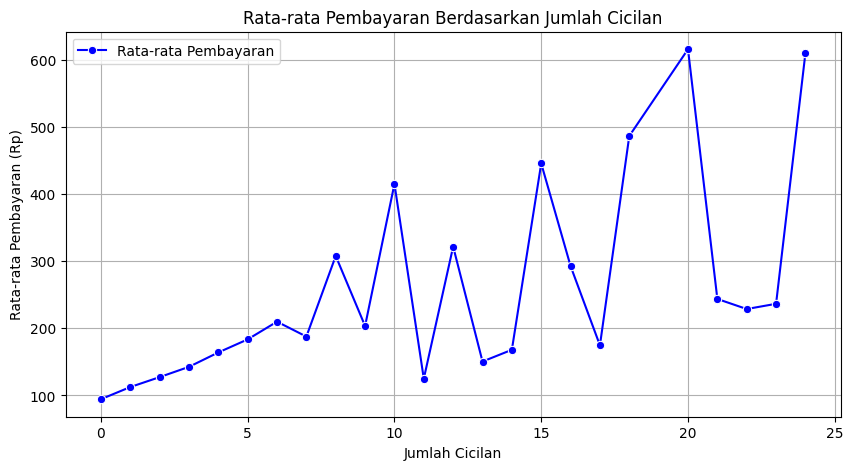

In [143]:
# Visualisasi Agregasi Berdasarkan Jumlah Cicilan
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=agg_installments, x="jumlah_cicilan", y="rata_rata_pembayaran", marker="o", color="blue", label="Rata-rata Pembayaran", ax=ax1)
ax1.set_title("Rata-rata Pembayaran Berdasarkan Jumlah Cicilan")
ax1.set_xlabel("Jumlah Cicilan")
ax1.set_ylabel("Rata-rata Pembayaran (Rp)")
ax1.grid(True)

plt.show()

**Insight:**
- Berdasarkan visualisasi rata-rata pembayaran berdasarkan jumlah cicilan, terlihat bahwa semakin besar jumlah cicilan, rata-rata pembayaran cenderung meningkat dengan beberapa fluktuasi. Pada cicilan rendah (1-5 kali), nilai rata-rata pembayaran stabil dan bertahap naik. Namun, pada cicilan yang lebih tinggi, terjadi lonjakan signifikan pada beberapa titik, menunjukkan bahwa beberapa pelanggan memilih cicilan panjang untuk transaksi bernilai besar. Pola ini mengindikasikan bahwa pelanggan yang menggunakan cicilan panjang cenderung melakukan pembelian dengan nominal lebih besar dibandingkan pelanggan dengan cicilan sedikit.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi metode pembayaran yang paling sering digunakan oleh pelanggan?

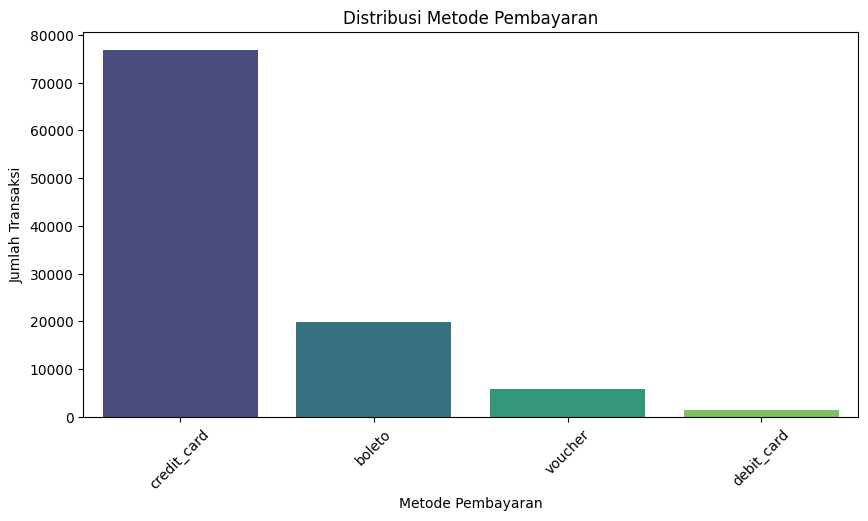

In [144]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dfreviews, x="payment_type",order=dfreviews["payment_type"].value_counts().index,hue="payment_type", palette="viridis", legend=False)
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Berdasarkan visualisasi distribusi metode pembayaran, terlihat bahwa kartu kredit merupakan metode pembayaran yang paling dominan dengan jumlah transaksi jauh lebih tinggi dibandingkan metode lainnya. Metode pembayaran kedua yang paling banyak digunakan adalah "boleto", diikuti oleh "voucher" dan "debit card" dengan jumlah transaksi yang jauh lebih sedikit. Hal ini menunjukkan bahwa mayoritas pelanggan lebih memilih kartu kredit untuk bertransaksi, kemungkinan karena kemudahan pembayaran secara cicilan, batas kredit yang lebih fleksibel, atau keuntungan tambahan seperti cashback dan reward points. Sementara itu, metode seperti "debit card" memiliki jumlah transaksi yang paling rendah, yang bisa disebabkan oleh preferensi pelanggan untuk menggunakan metode pembayaran yang memberikan lebih banyak manfaat finansial.

### Pertanyaan 2: Apakah ada korelasi antara jumlah cicilan (payment_installments) dengan nilai pembayaran (payment_value)?

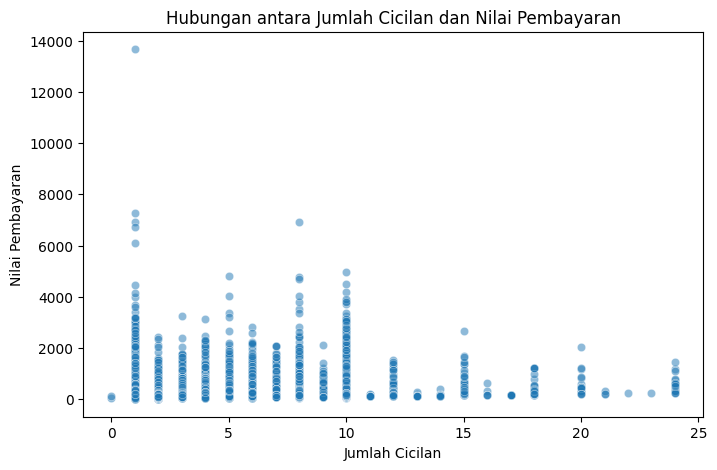

In [145]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dfreviews, x="payment_installments", y="payment_value", alpha=0.5)
plt.title("Hubungan antara Jumlah Cicilan dan Nilai Pembayaran")
plt.xlabel("Jumlah Cicilan")
plt.ylabel("Nilai Pembayaran")
plt.show()

**Insight:**
- Berdasarkan scatter plot di atas, terlihat bahwa jumlah cicilan yang lebih kecil (antara 1 hingga 10) memiliki variasi nilai pembayaran yang lebih besar, termasuk beberapa transaksi dengan nilai yang sangat tinggi. Namun, seiring bertambahnya jumlah cicilan, nilai pembayaran cenderung lebih rendah dan lebih terdistribusi merata dalam rentang yang lebih kecil. Hal ini menunjukkan bahwa pelanggan yang memilih cicilan lebih panjang kemungkinan besar melakukan pembayaran dengan nominal lebih kecil per transaksi, sedangkan pelanggan yang membayar dalam cicilan lebih sedikit cenderung melakukan transaksi dengan nilai lebih besar. Selain itu, ada beberapa outlier dengan nilai pembayaran yang sangat tinggi, terutama pada jumlah cicilan rendah, yang mungkin menunjukkan adanya transaksi dengan produk bernilai tinggi yang dibayar dalam cicilan sedikit atau bahkan lunas langsung.

In [146]:
# Korelasi numerik
correlation = dfreviews[["payment_installments", "payment_value"]].corr()
print("\nKorelasi antara jumlah cicilan dan nilai pembayaran:\n", correlation)


Korelasi antara jumlah cicilan dan nilai pembayaran:
                       payment_installments  payment_value
payment_installments              1.000000       0.330801
payment_value                     0.330801       1.000000


**Insight:**
- Berdasarkan hasil korelasi numerik, nilai korelasi antara jumlah cicilan (payment_installments) dan nilai pembayaran (payment_value) adalah 0.3308, yang menunjukkan korelasi positif lemah antara kedua variabel. Ini berarti bahwa ketika jumlah cicilan meningkat, nilai pembayaran juga cenderung meningkat, tetapi hubungan ini tidak terlalu kuat. Korelasi yang lemah ini menunjukkan bahwa jumlah cicilan bukanlah faktor dominan dalam menentukan besaran nilai pembayaran, karena mungkin ada variabel lain yang lebih berpengaruh, seperti jenis produk yang dibeli atau preferensi pembayaran pelanggan. Meskipun ada kecenderungan bahwa transaksi dengan jumlah cicilan lebih banyak memiliki nilai pembayaran yang lebih tinggi, hubungan ini tidak selalu konsisten di seluruh data.

## Conclusion

- Conclution pertanyaan 1 (Bagaimana distribusi metode pembayaran yang paling sering digunakan oleh pelanggan?) :
Berdasarkan analisis distribusi metode pembayaran, kartu kredit (credit_card) merupakan metode pembayaran yang paling dominan digunakan oleh pelanggan, dengan jumlah transaksi yang jauh lebih tinggi dibandingkan metode lainnya. Metode pembayaran boleto, voucher, dan debit_card memiliki jumlah transaksi yang lebih sedikit, dengan debit_card sebagai metode pembayaran yang paling jarang digunakan. Hal ini menunjukkan bahwa mayoritas pelanggan lebih memilih metode pembayaran berbasis kartu kredit, kemungkinan karena faktor kemudahan transaksi, fleksibilitas pembayaran, serta manfaat tambahan seperti cashback atau program reward.

- Conclution pertanyaan 2 (Apakah ada korelasi antara jumlah cicilan (payment_installments) dengan nilai pembayaran (payment_value)?) :
Analisis korelasi menunjukkan bahwa terdapat hubungan positif yang lemah (0.3308) antara jumlah cicilan dan nilai pembayaran. Artinya, secara umum, semakin besar jumlah cicilan, semakin tinggi nilai pembayaran, tetapi hubungan ini tidak cukup kuat untuk menyimpulkan bahwa jumlah cicilan adalah faktor utama dalam menentukan besarnya pembayaran. Ada kemungkinan bahwa faktor lain, seperti jenis produk yang dibeli atau kebijakan kredit dari penyedia layanan, memiliki pengaruh yang lebih signifikan terhadap nilai pembayaran pelanggan.